In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt
import cv2
import imghdr

In [2]:
batch_size = 64
img_height = 48
img_width = 48

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
 "D:/facial_expression/train",
  labels = "inferred",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode='grayscale',
  label_mode="categorical")

Found 28709 files belonging to 7 classes.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
 "D:/facial_expression/test",
  labels = 'inferred',
  label_mode = "categorical",
  seed=123,
  image_size=(48, 48),
  batch_size=batch_size,
  color_mode='grayscale')

Found 7178 files belonging to 7 classes.


In [5]:
class_names = train_ds.class_names
class_names


['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [6]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(64, 48, 48, 1)
(64, 7)


In [7]:
train_ds = train_ds.map(lambda x,y: (x/255, y))
val_ds = val_ds.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [8]:
train_ds.as_numpy_iterator().next()[0].min()

0.0

In [9]:
val_ds.as_numpy_iterator().next()[0].max()

1.0

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

model_1 = keras.Sequential([
    layers.Conv2D(64, (3,3), activation="relu", input_shape=(img_height, img_width, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
                  
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(7, activation="softmax")
    ])

In [12]:
model_1.compile("adam",
  loss="categorical_crossentropy",
    metrics=['accuracy'])

In [13]:
model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 21, 21, 64)       256       
 hNormalization)                                                 
                                                        

In [14]:
history_1 = model_1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20,
)

Epoch 1/20
449/449 [==============================] - 221s 489ms/step - loss: 1.5722 - accuracy: 0.3952 - val_loss: 1.6848 - val_accuracy: 0.3288
Epoch 2/20
449/449 [==============================] - 139s 310ms/step - loss: 1.2909 - accuracy: 0.5045 - val_loss: 1.4432 - val_accuracy: 0.4237
Epoch 3/20
449/449 [==============================] - 138s 308ms/step - loss: 1.1548 - accuracy: 0.5636 - val_loss: 1.6880 - val_accuracy: 0.3722
Epoch 4/20
449/449 [==============================] - 130s 289ms/step - loss: 1.0410 - accuracy: 0.6079 - val_loss: 2.0291 - val_accuracy: 0.3394
Epoch 5/20
449/449 [==============================] - 145s 322ms/step - loss: 0.9302 - accuracy: 0.6539 - val_loss: 1.3772 - val_accuracy: 0.4985
Epoch 6/20
449/449 [==============================] - 118s 262ms/step - loss: 0.8249 - accuracy: 0.6970 - val_loss: 1.3970 - val_accuracy: 0.5116
Epoch 7/20
449/449 [==============================] - 129s 286ms/step - loss: 0.7129 - accuracy: 0.7399 - val_loss: 1.6715 -

In [15]:
model_1.save('ai_dif_app.h5')

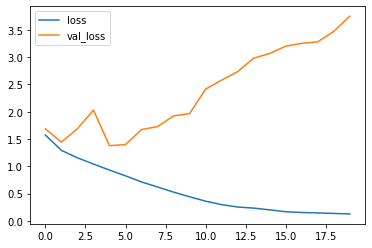

In [19]:
plt.plot(history_1.history['loss'], label= 'loss')
plt.plot(history_1.history['val_loss'], label= 'val_loss')
plt.legend()

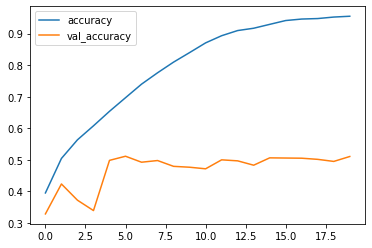

In [21]:
plt.plot(history_1.history['accuracy'], label= 'accuracy')
plt.plot(history_1.history['val_accuracy'], label= 'val_accuracy')
plt.legend()